# Inference
### YOLACT

---

Restarting your GPU:

In [12]:
from numba import cuda 

if cuda.is_available():
    device = cuda.get_current_device()
    device.reset()

**Download Pretrained Backbone Weights**

You can download the weights from [here](https://drive.google.com/file/d/1tvqFPd4bJtakOlmn-uIA492g2qurRChj/view), also see [their github repo](https://github.com/dbolya/yolact#training).

In [13]:
import os

if not (os.path.exists("./weights") and os.path.isdir("./weights")):
    print("create weights folder...")
    os.mkdir("./weights")
else:
    print("weights folder already exists")
    print("Found these weights:")
    founded_weights = dict()
    for idx, name in enumerate(start=1, iterable=sorted(os.listdir("./weights"))):
        print(f"    {idx}. {name}")
        founded_weights[idx] = name

weights folder already exists
Found these weights:
    1. 2024-06-05_15-39_YOLACT_test_training_with_WISDOM-Sim_399_50000.pth
    2. 2024-06-05_15-39_YOLACT_test_training_with_WISDOM-Sim_4_11000.pth
    3. 2024-06-05_7-9_YOLACT_test_training_with_WISDOM-Sim.pth
    4. 2024-06-06_23-56_YOLACT_test_training_2_with_WISDOM-Sim_399_50000.pth
    5. 2024-09-05_18-02_YOLACT_test_training_3_with_WISDOM-Sim_399_50000.pth
    6. 2024-09-06_17-35_YOLACT_test_training_4_with_WISDOM-Sim_399_50000.pth
    7. 2024-09-09_09-55_YOLACT_test_training_5_with_WISDOM-Sim_399_50000.pth
    8. 2024-09-10_10-22_YOLACT_test_training_6_with_WISDOM-Sim_399_50000.pth
    9. 2024-09-11_11-04_YOLACT_rgb_test_training_1_with_WISDOM-Real_399_400.pth
    10. 2024-09-16_12-03_YOLACT_rgb_test_training_2_with_WISDOM-Real_399_400.pth
    11. 2024-09-16_13-49_YOLACT_rgb_test_training_3_with_WISDOM-Real_649_2000_interrupt.pth
    12. 2024-09-16_17-09_YOLACT_sim_test_training_7_with_WISDOM Sim_399_50000.pth


In [14]:
WEIGHT_CHOOSE = 1

print(f"You choose: {founded_weights[WEIGHT_CHOOSE]}")

You choose: 2024-06-05_15-39_YOLACT_test_training_with_WISDOM-Sim_399_50000.pth


---
### VARIABLES

In [15]:
!pwd

/home/tobia/src/instance-segmentation


In [16]:
from datetime import datetime, timedelta

NOW = datetime.now()
DATE = f"{NOW.year:04}-{NOW.month:02}-{NOW.day:02}_{NOW.hour:02}-{NOW.minute:02}"

print(f"Date: {DATE}")

Date: 2024-09-17_09-10


In [ ]:
from yolact_toolkit import DATA_FORMAT

In [17]:
MODEL_SAVE_PATH = "./weights/"
WEIGHTS_NAME = founded_weights[WEIGHT_CHOOSE]

USED_DATA_FORMAT = DATA_FORMAT.DUAL_DIR
PATH_TO_INFERENCE_IMAGES = "/home/tobia/data/wisdom/wisdom-sim/depth_ims"
# PATH_TO_INFERENCE_IMAGES = "/home/tobia/data/wisdom/wisdom-real/low-res/color_ims/"
PATH_TO_INFERENCE_MASKS = "/home/tobia/data/wisdom/wisdom-sim/modal_segmasks/"
# PATH_TO_INFERENCE_MASKS = "/home/tobia/data/wisdom/wisdom-real/low-res/modal_segmasks"

INFERENCE_DATA_MODE = "range" # auto, random, range, single -> then use START_IDX and END_IDX
INFERENCE_DATA_AMOUNT = 5
INFERENCE_START_IDX = 0
INFERENCE_END_IDX = 5
INFERENCE_IMAGE_NAME = "image_00011811.png" 

IMG_MAX_SIZE = 550

OUTPUT_DIR = "./output"
OUTPUT_TYPE = "png"
SHOULD_SAVE = True

INTERACTIVE = False
SHOULD_VISUALIZE = True
SAVE_VISUALIZATION = True
SHOULD_PRINT = True

--- 
### Imports

In [18]:
# add nn-lib
import sys
sys.path.append("./")

In [19]:
# yolact toolkit
from yolact_toolkit import inference

---
### Inference

Inference Image Indices:
[0 1 2 3 4 5]
Inference Data Amount: 6

--------------------------------
Verifying Data...

> > > Images < < <
Found: 100.0% (6/6)

> > > Masks < < <
Found: 100.0% (6/6)

Updating Images...
From 6 to 6 Images
    -> Image amount reduced by 0.0%
--------------------------------

Instance Segmentation with YOLACT (inference)

Loading Neuronal Network...


/home/tobia/anaconda3/envs/yolact/lib/python3.12/site-packages/torch/jit/_recursive.py:313: UserWarning: 'lat_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  warnings.warn(
/home/tobia/anaconda3/envs/yolact/lib/python3.12/site-packages/torch/jit/_recursive.py:313: UserWarning: 'downsample_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  warnings.warn(
/home/tobia/anaconda3/envs/yolact/lib/python3.12/site-packages/torch/jit/_recursive.py:313: UserWarning: 'pred_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  warnings.warn(


Loading Weights...
Inference Network...

Showing Visualization*


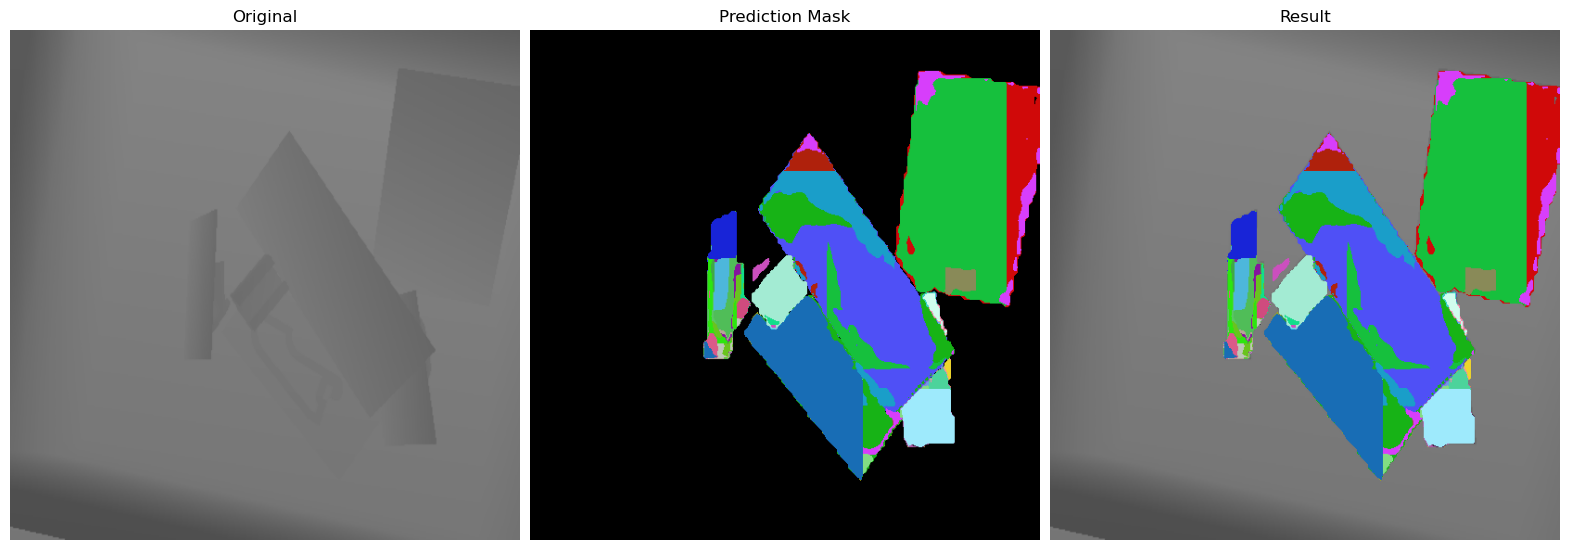


Evaluation:
    - Pixel Accuracy = 71.49%
    - IoU = 0.9738159236259153
    - Precision = 99.22%
        -> How many positive predicted are really positive
        -> Only BG/FG
    - Recall = 98.13%
        -> How many positive were found
        -> Only BG/FG

Showing Ground Truth Visualization*


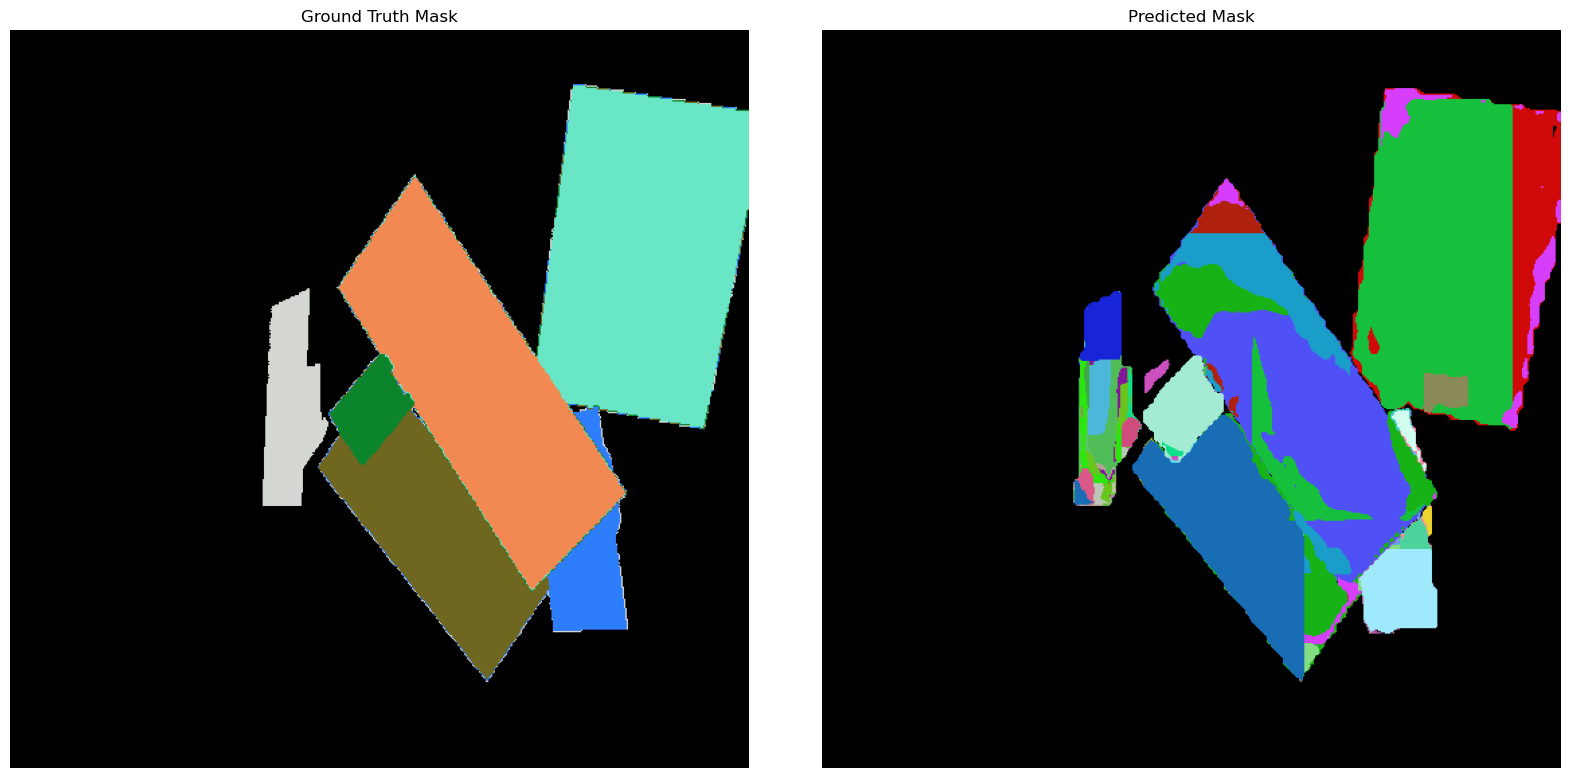

Inference Network...

Showing Visualization*


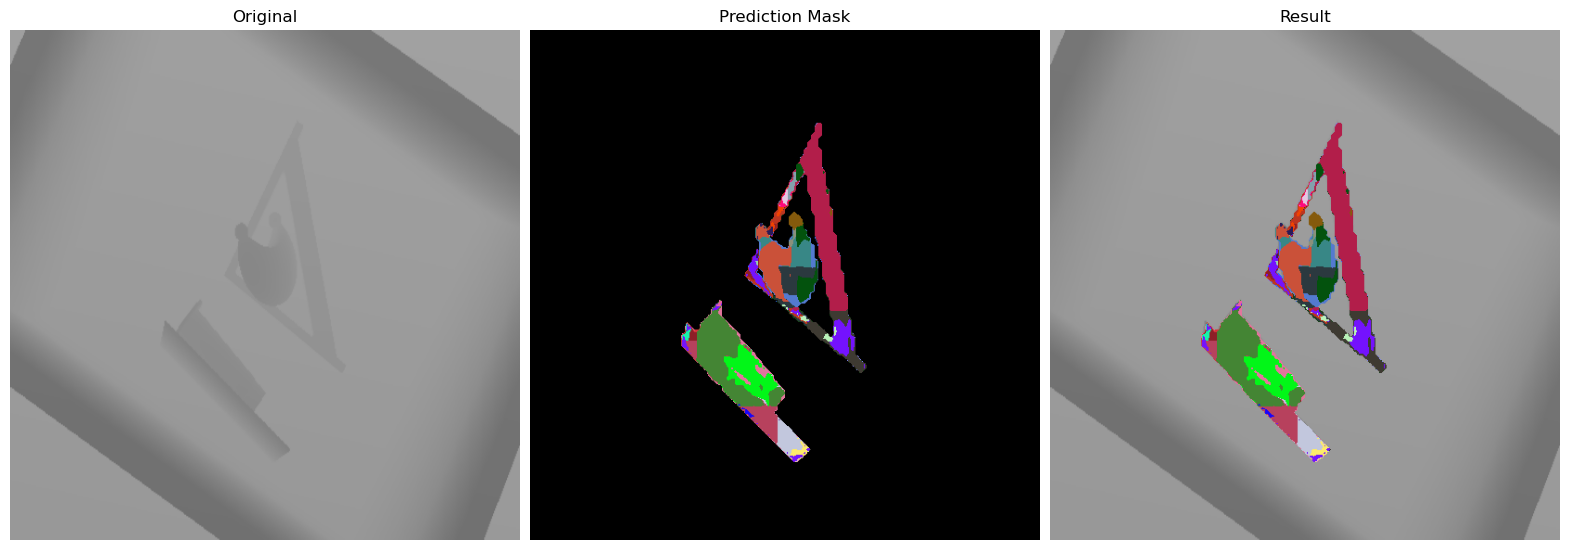


Evaluation:
    - Pixel Accuracy = 93.41%
    - IoU = 0.9336122047244094
    - Precision = 97.29%
        -> How many positive predicted are really positive
        -> Only BG/FG
    - Recall = 95.86%
        -> How many positive were found
        -> Only BG/FG

Showing Ground Truth Visualization*


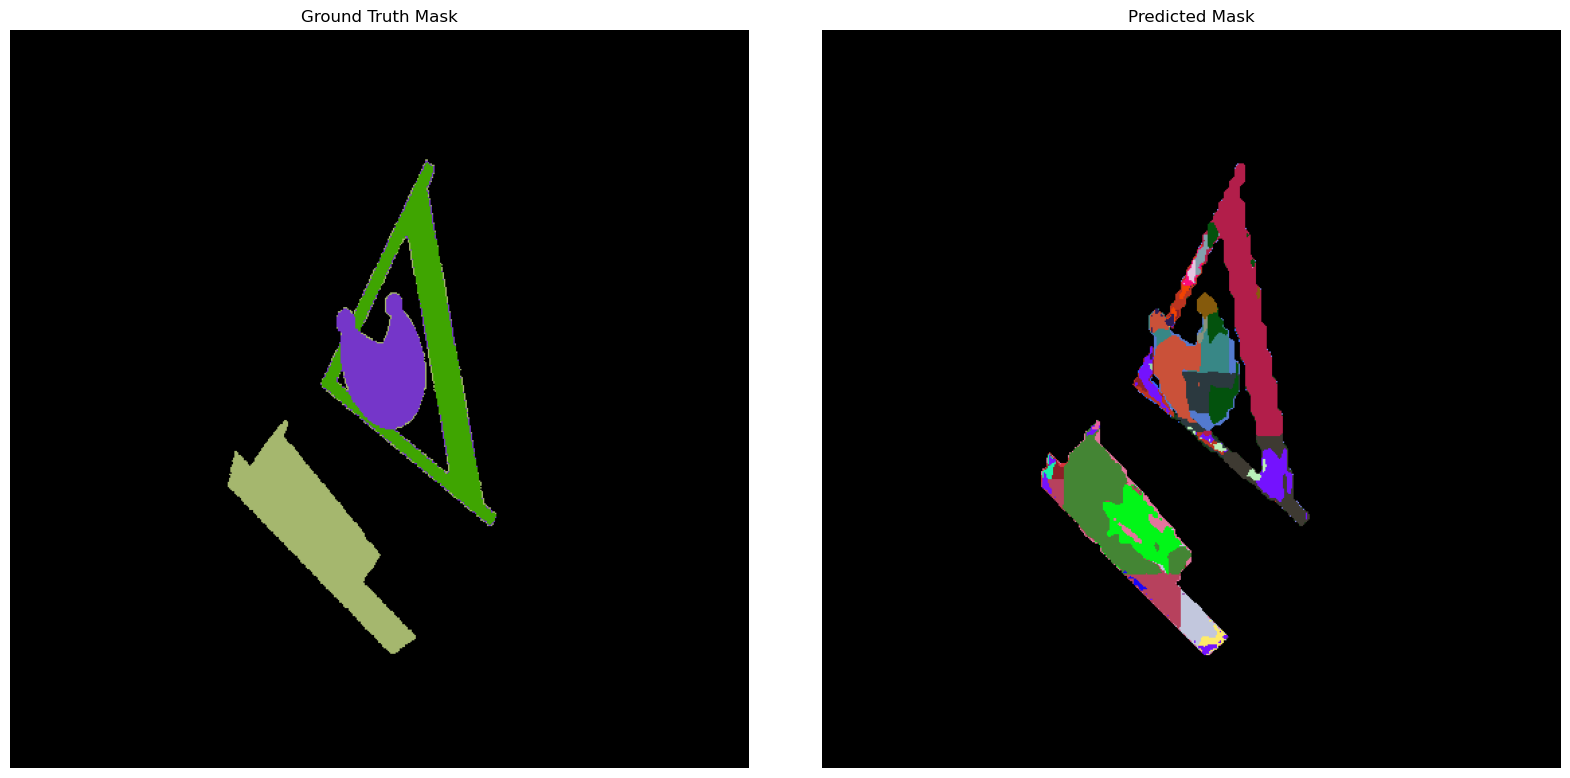

Inference Network...

Showing Visualization*


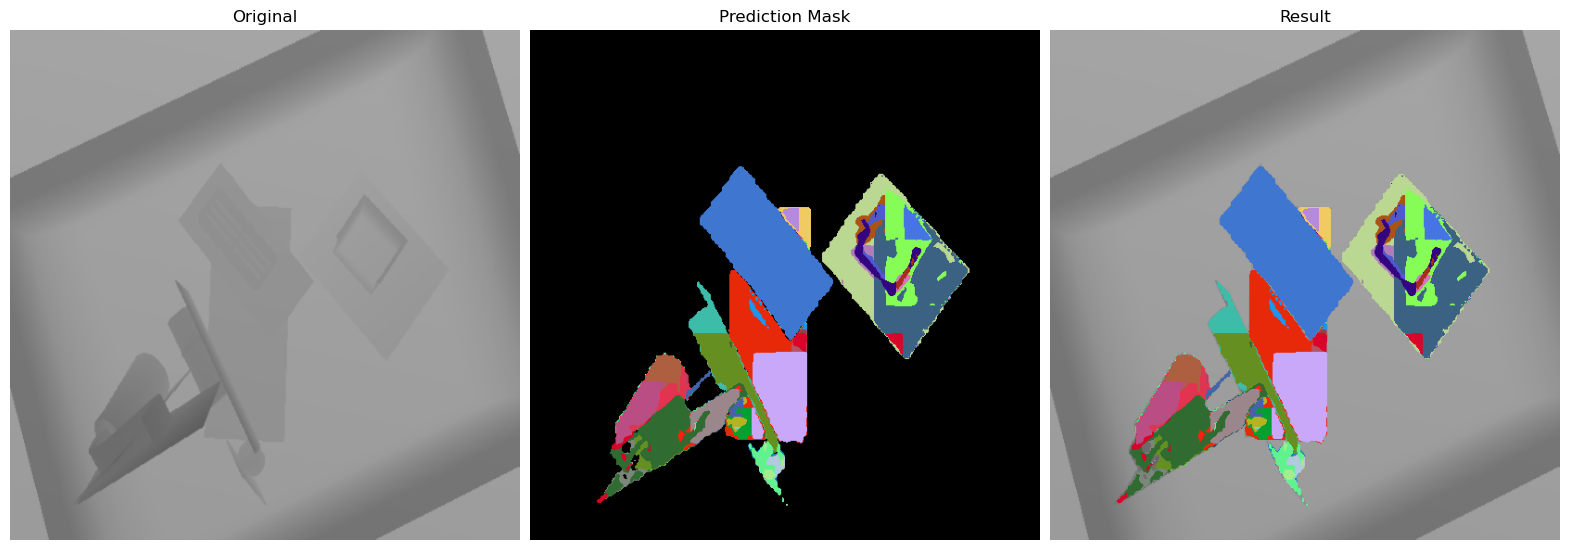


Evaluation:
    - Pixel Accuracy = 85.12%
    - IoU = 0.9613889472578273
    - Precision = 99.36%
        -> How many positive predicted are really positive
        -> Only BG/FG
    - Recall = 96.74%
        -> How many positive were found
        -> Only BG/FG

Showing Ground Truth Visualization*


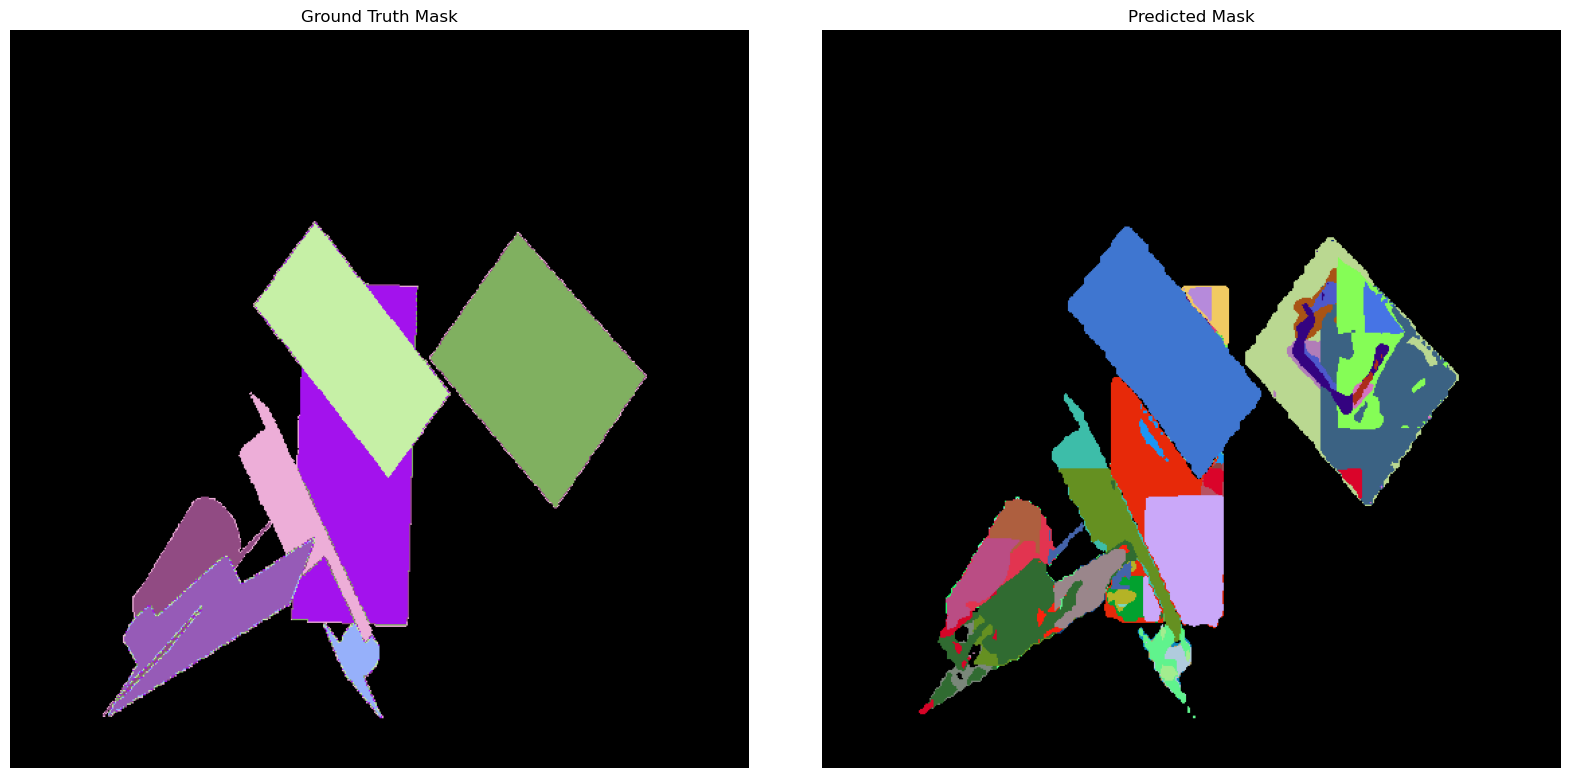

Inference Network...

Showing Visualization*


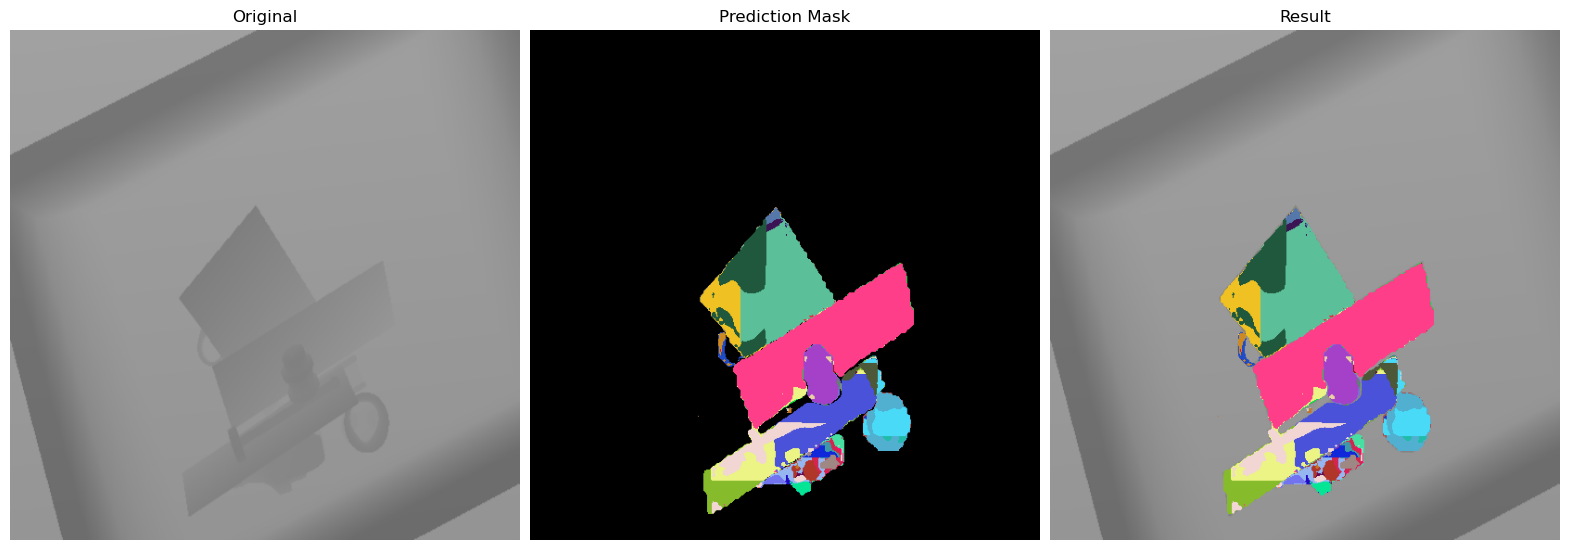


Evaluation:
    - Pixel Accuracy = 85.67%
    - IoU = 0.965842572825563
    - Precision = 99.21%
        -> How many positive predicted are really positive
        -> Only BG/FG
    - Recall = 97.34%
        -> How many positive were found
        -> Only BG/FG

Showing Ground Truth Visualization*


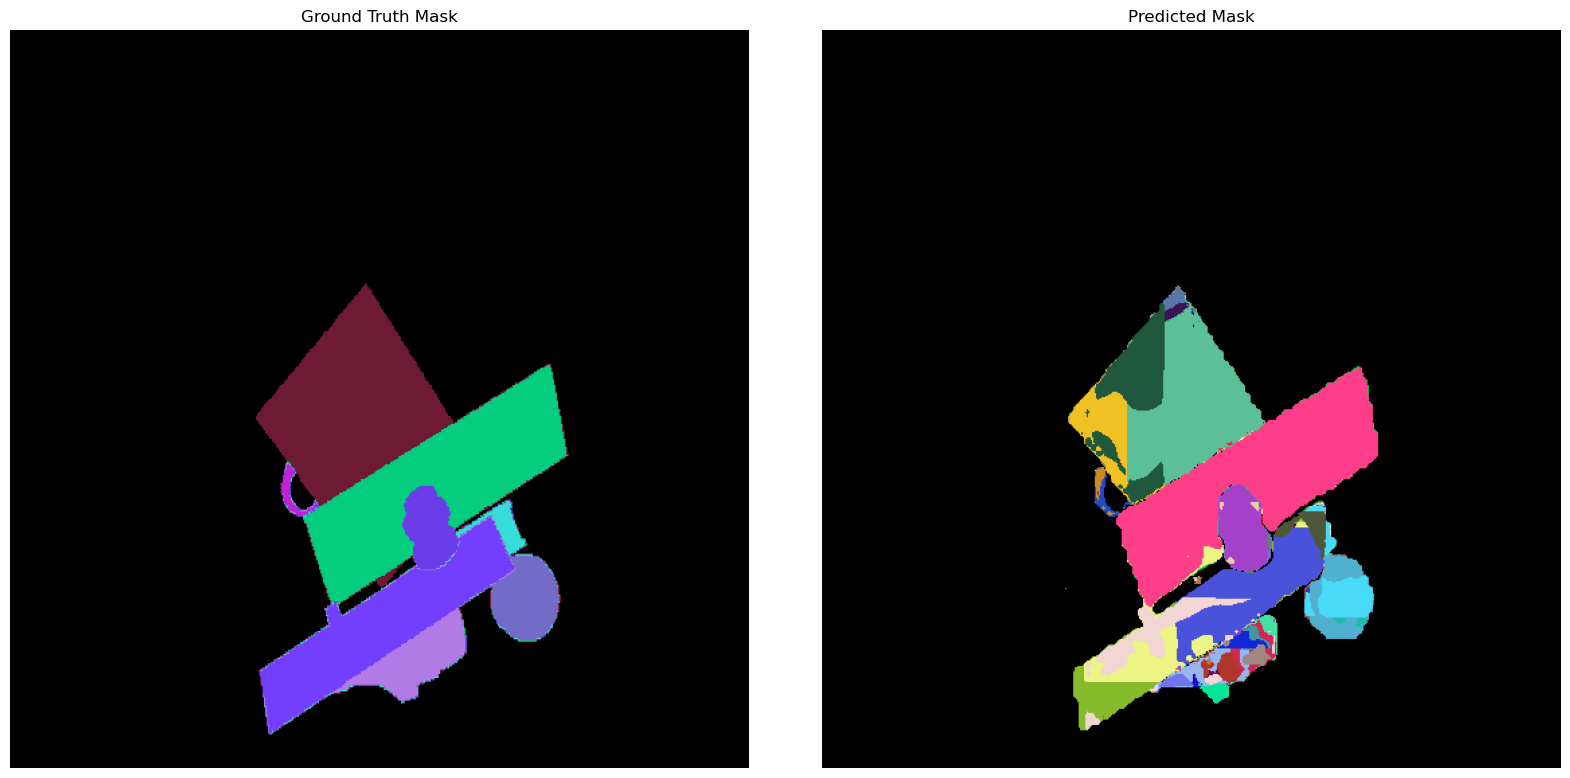

Inference Network...

Showing Visualization*


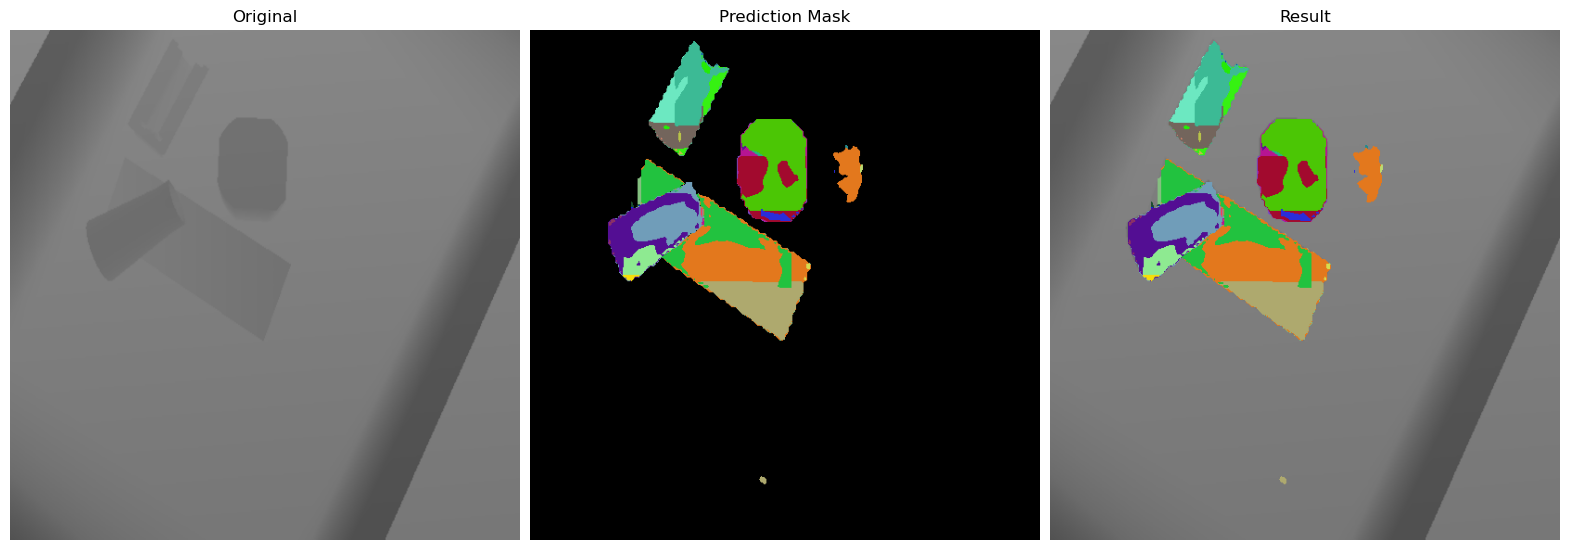


Evaluation:
    - Pixel Accuracy = 88.7%
    - IoU = 0.9288007940214853
    - Precision = 95.21%
        -> How many positive predicted are really positive
        -> Only BG/FG
    - Recall = 97.43%
        -> How many positive were found
        -> Only BG/FG

Showing Ground Truth Visualization*


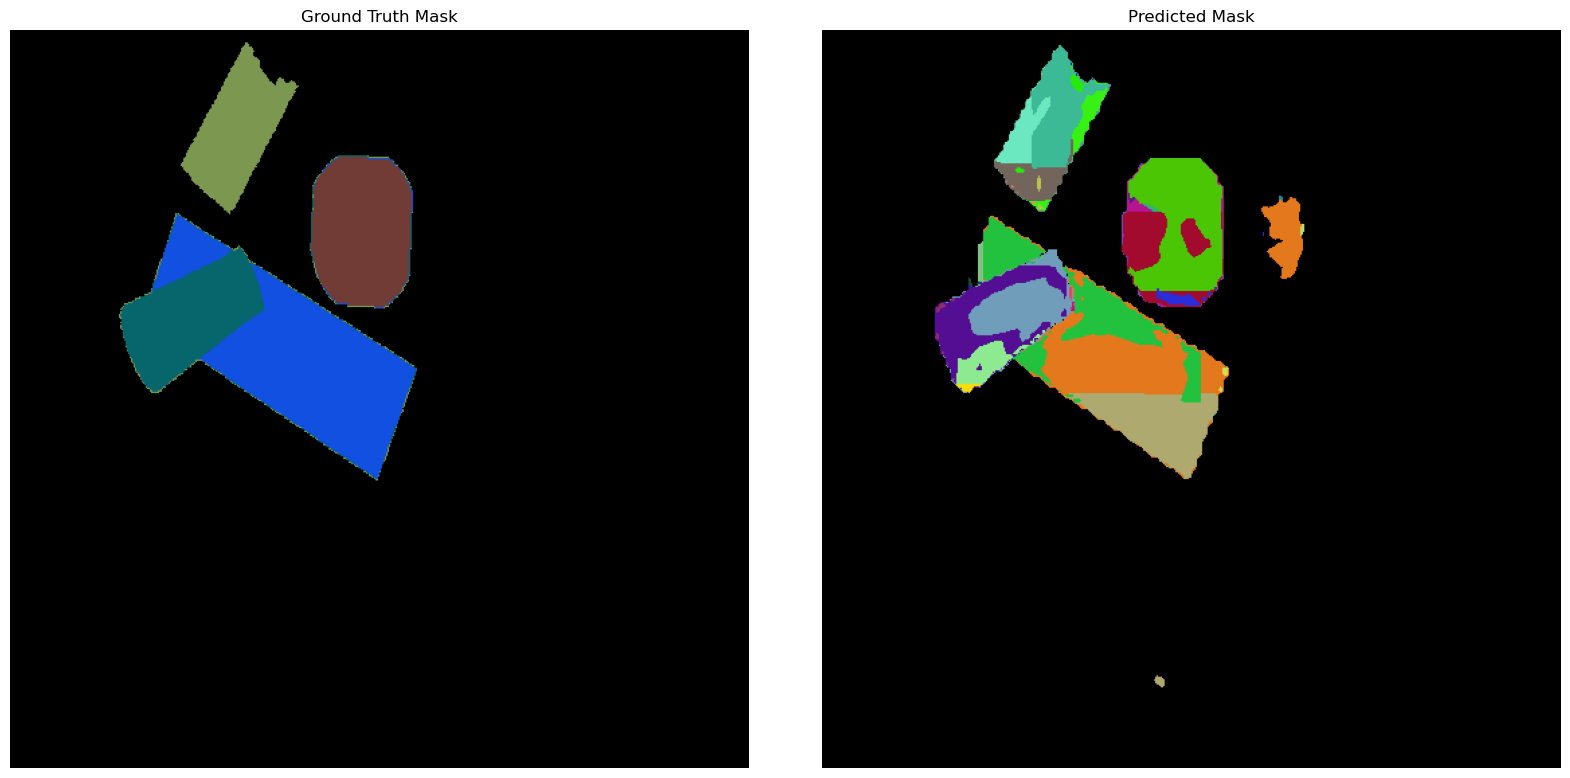

Inference Network...

Showing Visualization*


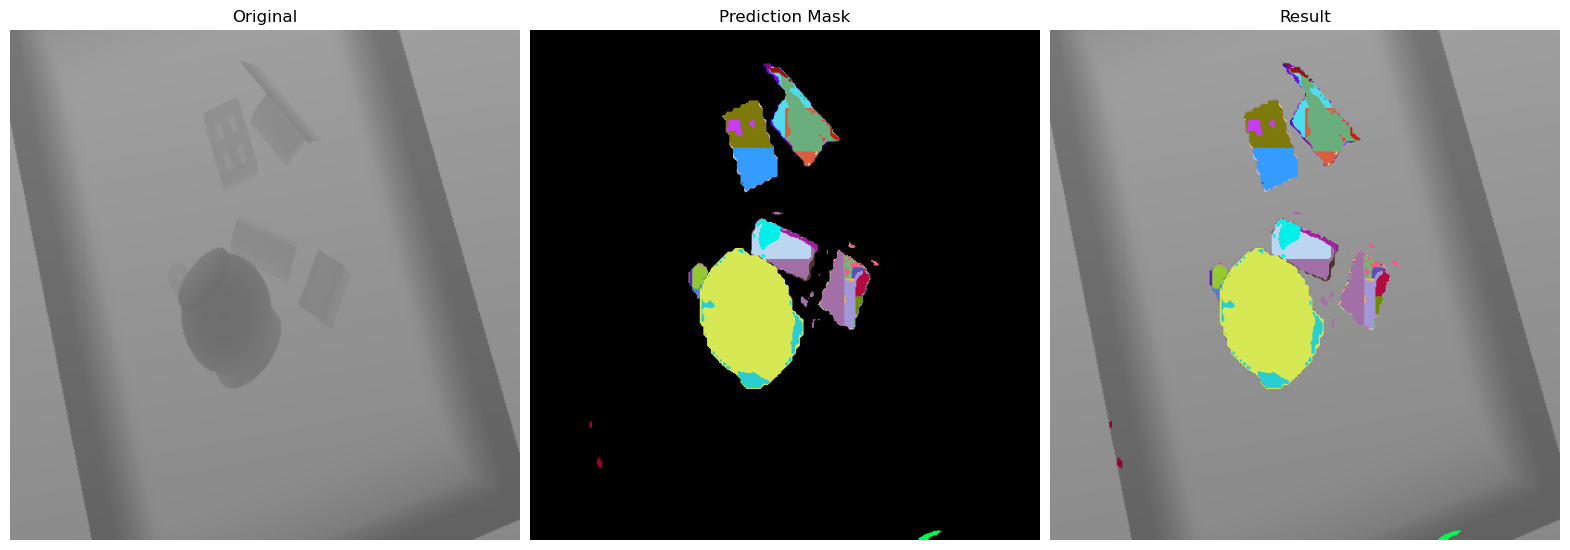


Evaluation:
    - Pixel Accuracy = 91.19%
    - IoU = 0.9425002813097784
    - Precision = 96.86%
        -> How many positive predicted are really positive
        -> Only BG/FG
    - Recall = 97.22%
        -> How many positive were found
        -> Only BG/FG

Showing Ground Truth Visualization*


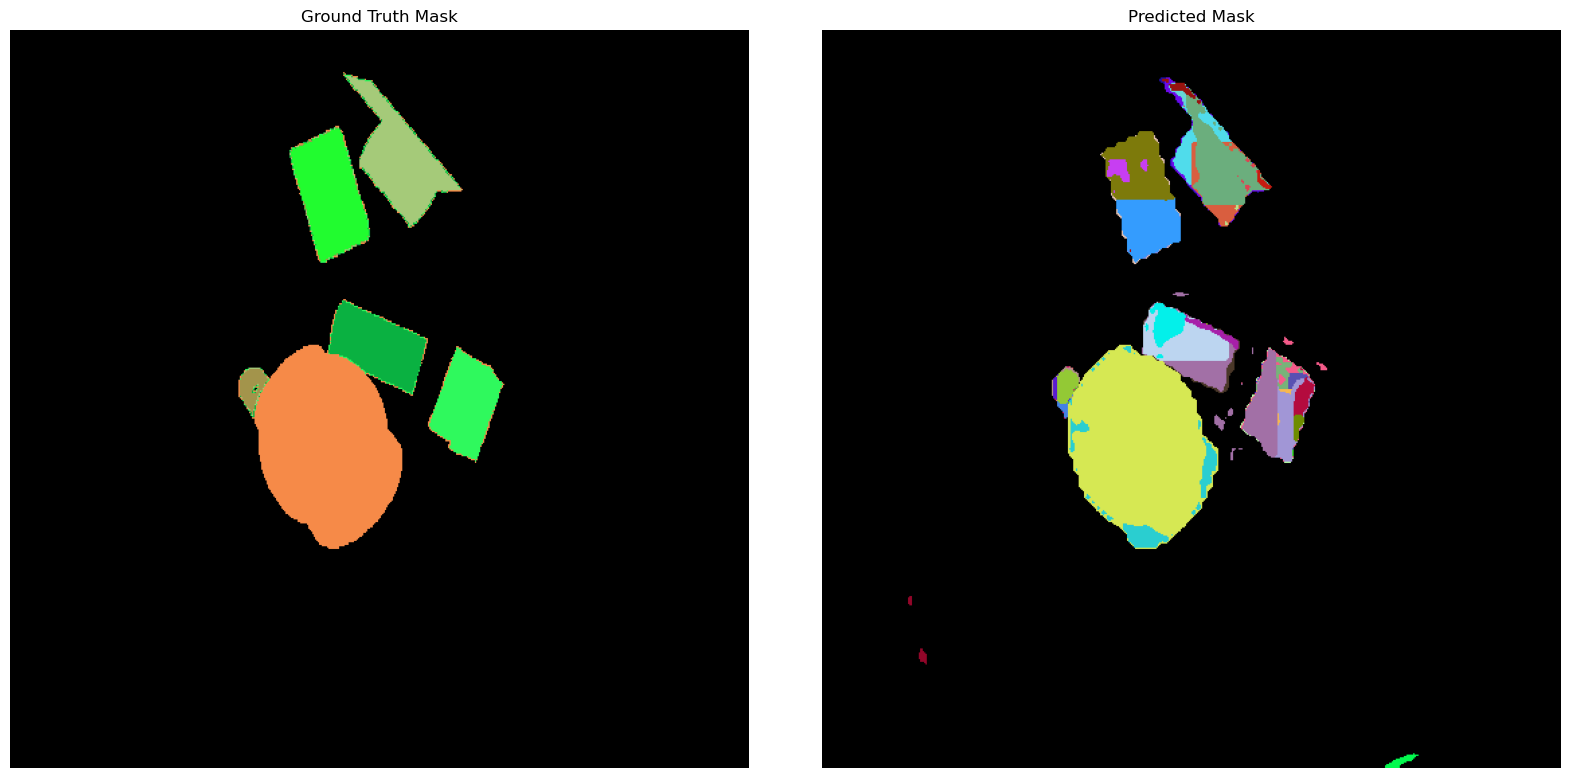

In [20]:
inference(
    MODEL_SAVE_PATH=MODEL_SAVE_PATH, 
    WEIGHTS_NAME=WEIGHTS_NAME,
    PATH_TO_INFERENCE_IMAGES=PATH_TO_INFERENCE_IMAGES,
    PATH_TO_INFERENCE_MASKS=PATH_TO_INFERENCE_MASKS,
    INFERENCE_DATA_MODE=INFERENCE_DATA_MODE,
    INFERENCE_DATA_AMOUNT=INFERENCE_DATA_AMOUNT,
    INFERENCE_START_IDX=INFERENCE_START_IDX,
    INFERENCE_END_IDX=INFERENCE_END_IDX,
    INFERENCE_IMAGE_NAME=INFERENCE_IMAGE_NAME,
    IMG_MAX_SIZE=IMG_MAX_SIZE,
    OUTPUT_DIR=OUTPUT_DIR,
    OUTPUT_TYPE=OUTPUT_TYPE,
    INTERACTIVE=INTERACTIVE,
    SHOULD_SAVE=SHOULD_SAVE,
    SHOULD_VISUALIZE=SHOULD_VISUALIZE,
    SAVE_VISUALIZATION=SAVE_VISUALIZATION,
    SHOULD_PRINT=SHOULD_PRINT,
    USED_DATA_FORMAT=USED_DATA_FORMAT
    )

---